# Denoising method using AutoEncoder

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import strym
from strym import strymread
from strym import strymmap
import numpy as np

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

In [4]:
folder = '../../PandaData/2020_07_08/'
toyota = "2020-07-08-15-15-54_2T3MWRFVXLW056972"
toyota_can_file = folder + toyota + "_CAN_Messages.csv"
r_toyota = strymread(csvfile=toyota_can_file)


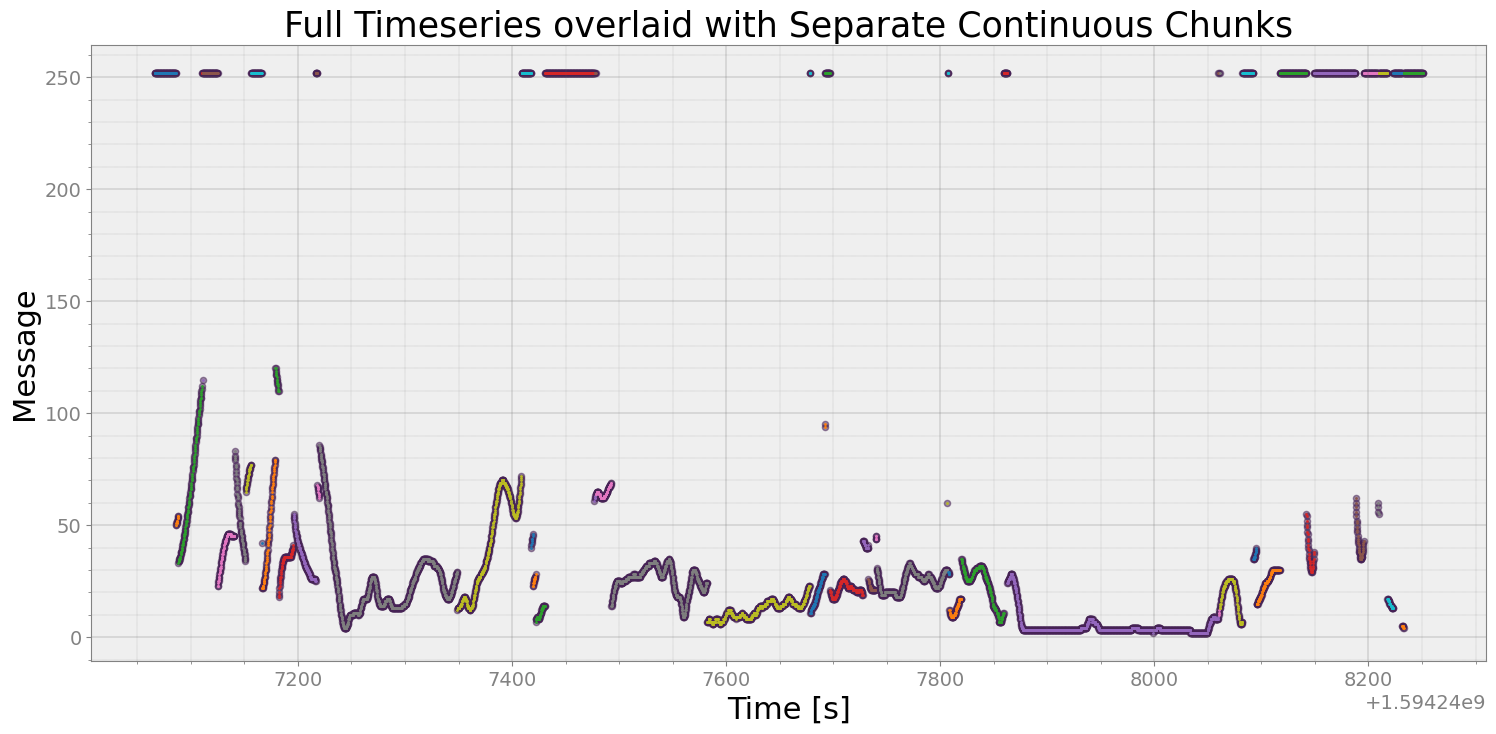

In [5]:
lead_dist = r_toyota.get_ts(msg=869,signal="LEAD_DISTANCE")
lead_dist_l = lead_dist[(lead_dist['Time'] - lead_dist['Time'].iloc[0] >= 511)]
lead_dist_l_chunks = strymread.create_chunks(lead_dist_l, plot = True)

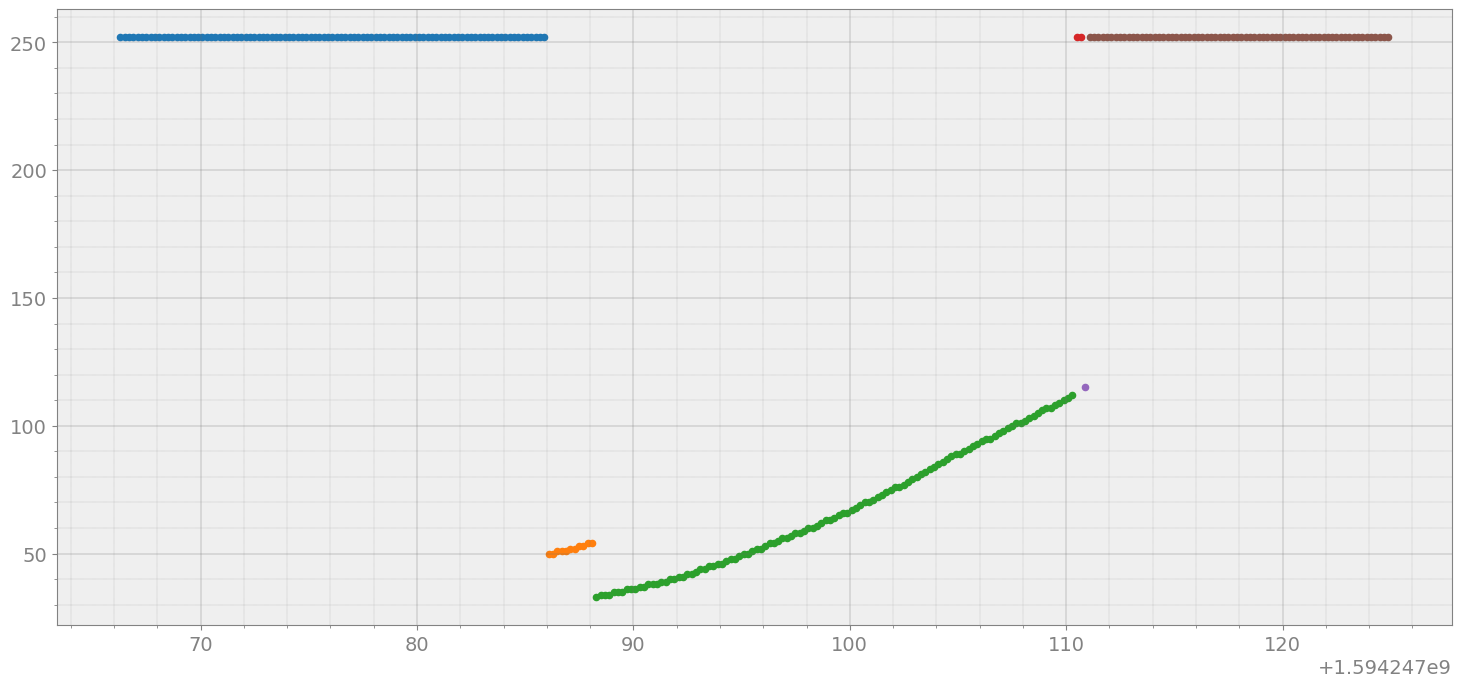

In [6]:
fig, ax = strymread.create_fig(num_of_subplots=1)
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[0], s= 20, marker = 'o')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[1], s= 20, marker = 'o')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[2], s= 20, marker = 'o')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[3], s= 20, marker = 'o')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[4], s= 20, marker = 'o')
ax[0].scatter(x = 'Time', y = 'Message', data = lead_dist_l_chunks[5], s= 20, marker = 'o')

plt.show()

## Now, lets design a neural network that will denoise that data, at the same time removes outlier and create a model that can be used for interpolating

In [7]:
time_original = lead_dist_l_chunks[2]['Time'].values
time = (time_original - time_original[0])/(time_original[-1] - time_original[0])
message_original = lead_dist_l_chunks[2]['Message'].values
msg_max = np.max(message_original)
msg_min = np.min(message_original)
message = (message_original  - msg_min)/(msg_max - msg_min)

In [8]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()
# Training
model.fit( time, message, epochs=1000, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

4/4 [==============================] - ETA: 0s - loss: 2.5860e-0 - 0s 2ms/step - loss: 1.8932e-05
Epoch 64/1000
4/4 [==============================] - ETA: 0s - loss: 9.1814e-0 - 0s 1ms/step - loss: 1.7169e-05
Epoch 65/1000
4/4 [==============================] - ETA: 0s - loss: 1.7984e-0 - 0s 2ms/step - loss: 1.6955e-05
Epoch 66/1000
4/4 [==============================] - ETA: 0s - loss: 1.7111e-0 - 0s 1ms/step - loss: 1.6315e-05
Epoch 67/1000
4/4 [==============================] - ETA: 0s - loss: 1.7337e-0 - 0s 1ms/step - loss: 1.7086e-05
Epoch 68/1000
4/4 [==============================] - ETA: 0s - loss: 2.3263e-0 - 0s 2ms/step - loss: 1.6923e-05
Epoch 69/1000
4/4 [==============================] - ETA: 0s - loss: 1.6610e-0 - 0s 2ms/step - loss: 1.6005e-05
Epoch 70/1000
4/4 [==============================] - ETA: 0s - loss: 2.0214e-0 - 0s 1ms/step - loss: 1.7656e-05
Epoch 71/1000
4/4 [==============================] - ETA: 0s - loss: 1.7118e-0 - 0s 1ms/step - loss: 1.5983e-05
Epoch 

Epoch 136/1000
4/4 [==============================] - ETA: 0s - loss: 1.5360e-0 - 0s 2ms/step - loss: 1.5924e-05
Epoch 137/1000
4/4 [==============================] - ETA: 0s - loss: 1.8266e-0 - 0s 2ms/step - loss: 1.4653e-05
Epoch 138/1000
4/4 [==============================] - ETA: 0s - loss: 1.1185e-0 - 0s 2ms/step - loss: 1.4702e-05
Epoch 139/1000
4/4 [==============================] - ETA: 0s - loss: 1.3590e-0 - 0s 2ms/step - loss: 1.4629e-05
Epoch 140/1000
4/4 [==============================] - ETA: 0s - loss: 1.2160e-0 - 0s 2ms/step - loss: 1.5054e-05
Epoch 141/1000
4/4 [==============================] - ETA: 0s - loss: 1.6137e-0 - 0s 2ms/step - loss: 1.6594e-05
Epoch 142/1000
4/4 [==============================] - ETA: 0s - loss: 1.4973e-0 - 0s 2ms/step - loss: 1.6473e-05
Epoch 143/1000
4/4 [==============================] - ETA: 0s - loss: 1.5928e-0 - 0s 2ms/step - loss: 1.5771e-05
Epoch 144/1000
4/4 [==============================] - ETA: 0s - loss: 2.0191e-0 - 0s 2ms/step - 

4/4 [==============================] - ETA: 0s - loss: 2.0760e-0 - 0s 2ms/step - loss: 1.9117e-05
Epoch 209/1000
4/4 [==============================] - ETA: 0s - loss: 1.2756e-0 - 0s 2ms/step - loss: 2.2021e-05
Epoch 210/1000
4/4 [==============================] - ETA: 0s - loss: 2.3969e-0 - 0s 2ms/step - loss: 2.2292e-05
Epoch 211/1000
4/4 [==============================] - ETA: 0s - loss: 3.1469e-0 - 0s 2ms/step - loss: 2.4910e-05
Epoch 212/1000
4/4 [==============================] - ETA: 0s - loss: 1.5124e-0 - 0s 2ms/step - loss: 1.8912e-05
Epoch 213/1000
4/4 [==============================] - ETA: 0s - loss: 1.7656e-0 - 0s 2ms/step - loss: 1.5716e-05
Epoch 214/1000
4/4 [==============================] - ETA: 0s - loss: 1.3085e-0 - 0s 2ms/step - loss: 1.4972e-05
Epoch 215/1000
4/4 [==============================] - ETA: 0s - loss: 1.5970e-0 - 0s 2ms/step - loss: 1.5675e-05
Epoch 216/1000
4/4 [==============================] - ETA: 0s - loss: 1.8376e-0 - 0s 2ms/step - loss: 1.4318e-0

4/4 [==============================] - ETA: 0s - loss: 3.4527e-0 - 0s 2ms/step - loss: 3.2642e-05
Epoch 281/1000
4/4 [==============================] - ETA: 0s - loss: 3.3141e-0 - 0s 2ms/step - loss: 2.5363e-05
Epoch 282/1000
4/4 [==============================] - ETA: 0s - loss: 1.2963e-0 - 0s 1ms/step - loss: 1.7425e-05
Epoch 283/1000
4/4 [==============================] - ETA: 0s - loss: 2.2981e-0 - 0s 2ms/step - loss: 1.9147e-05
Epoch 284/1000
4/4 [==============================] - ETA: 0s - loss: 1.5464e-0 - 0s 2ms/step - loss: 1.4804e-05
Epoch 285/1000
4/4 [==============================] - ETA: 0s - loss: 1.3672e-0 - 0s 2ms/step - loss: 1.4572e-05
Epoch 286/1000
4/4 [==============================] - ETA: 0s - loss: 1.2191e-0 - 0s 1ms/step - loss: 1.4977e-05
Epoch 287/1000
4/4 [==============================] - ETA: 0s - loss: 1.5165e-0 - 0s 2ms/step - loss: 2.0279e-05
Epoch 288/1000
4/4 [==============================] - ETA: 0s - loss: 1.4774e-0 - 0s 1ms/step - loss: 1.6031e-0

4/4 [==============================] - ETA: 0s - loss: 1.1152e-0 - 0s 2ms/step - loss: 1.6505e-05
Epoch 353/1000
4/4 [==============================] - ETA: 0s - loss: 1.4894e-0 - 0s 2ms/step - loss: 1.6363e-05
Epoch 354/1000
4/4 [==============================] - ETA: 0s - loss: 1.3758e-0 - 0s 2ms/step - loss: 1.6401e-05
Epoch 355/1000
4/4 [==============================] - ETA: 0s - loss: 1.4004e-0 - 0s 2ms/step - loss: 1.4000e-05
Epoch 356/1000
4/4 [==============================] - ETA: 0s - loss: 1.1984e-0 - 0s 2ms/step - loss: 1.4442e-05
Epoch 357/1000
4/4 [==============================] - ETA: 0s - loss: 1.6152e-0 - 0s 2ms/step - loss: 1.6943e-05
Epoch 358/1000
4/4 [==============================] - ETA: 0s - loss: 1.5539e-0 - 0s 2ms/step - loss: 1.7183e-05
Epoch 359/1000
4/4 [==============================] - ETA: 0s - loss: 1.3688e-0 - 0s 2ms/step - loss: 1.2642e-05
Epoch 360/1000
4/4 [==============================] - ETA: 0s - loss: 1.3557e-0 - 0s 2ms/step - loss: 1.2908e-0

4/4 [==============================] - ETA: 0s - loss: 1.3809e-0 - 0s 2ms/step - loss: 1.9688e-05
Epoch 425/1000
4/4 [==============================] - ETA: 0s - loss: 2.7682e-0 - 0s 2ms/step - loss: 1.8722e-05
Epoch 426/1000
4/4 [==============================] - ETA: 0s - loss: 1.3700e-0 - 0s 2ms/step - loss: 1.5433e-05
Epoch 427/1000
4/4 [==============================] - ETA: 0s - loss: 1.5647e-0 - 0s 2ms/step - loss: 1.8821e-05
Epoch 428/1000
4/4 [==============================] - ETA: 0s - loss: 1.3821e-0 - 0s 2ms/step - loss: 1.3946e-05
Epoch 429/1000
4/4 [==============================] - ETA: 0s - loss: 1.5242e-0 - 0s 2ms/step - loss: 1.5603e-05
Epoch 430/1000
4/4 [==============================] - ETA: 0s - loss: 1.1388e-0 - 0s 2ms/step - loss: 1.4501e-05
Epoch 431/1000
4/4 [==============================] - ETA: 0s - loss: 1.4664e-0 - 0s 2ms/step - loss: 1.2791e-05
Epoch 432/1000
4/4 [==============================] - ETA: 0s - loss: 1.3113e-0 - 0s 2ms/step - loss: 1.3368e-0

4/4 [==============================] - ETA: 0s - loss: 1.6300e-0 - 0s 1ms/step - loss: 1.7021e-05
Epoch 497/1000
4/4 [==============================] - ETA: 0s - loss: 1.6032e-0 - 0s 1ms/step - loss: 1.5280e-05
Epoch 498/1000
4/4 [==============================] - ETA: 0s - loss: 1.9256e-0 - 0s 1ms/step - loss: 2.0358e-05
Epoch 499/1000
4/4 [==============================] - ETA: 0s - loss: 2.1140e-0 - 0s 1ms/step - loss: 2.0682e-05
Epoch 500/1000
4/4 [==============================] - ETA: 0s - loss: 4.8317e-0 - 0s 1ms/step - loss: 2.9805e-05
Epoch 501/1000
4/4 [==============================] - ETA: 0s - loss: 2.2040e-0 - 0s 1ms/step - loss: 2.4875e-05
Epoch 502/1000
4/4 [==============================] - ETA: 0s - loss: 2.3445e-0 - 0s 1ms/step - loss: 2.4222e-05
Epoch 503/1000
4/4 [==============================] - ETA: 0s - loss: 2.7778e-0 - 0s 1ms/step - loss: 3.9835e-05
Epoch 504/1000
4/4 [==============================] - ETA: 0s - loss: 2.1257e-0 - 0s 1ms/step - loss: 3.1963e-0

4/4 [==============================] - ETA: 0s - loss: 1.9591e-0 - 0s 1ms/step - loss: 2.5088e-05
Epoch 569/1000
4/4 [==============================] - ETA: 0s - loss: 1.5058e-0 - 0s 1ms/step - loss: 1.9349e-05
Epoch 570/1000
4/4 [==============================] - ETA: 0s - loss: 3.5510e-0 - 0s 1ms/step - loss: 2.4286e-05
Epoch 571/1000
4/4 [==============================] - ETA: 0s - loss: 1.0561e-0 - 0s 2ms/step - loss: 1.7248e-05
Epoch 572/1000
4/4 [==============================] - ETA: 0s - loss: 1.3023e-0 - 0s 2ms/step - loss: 1.6874e-05
Epoch 573/1000
4/4 [==============================] - ETA: 0s - loss: 1.5973e-0 - 0s 2ms/step - loss: 1.9888e-05
Epoch 574/1000
4/4 [==============================] - ETA: 0s - loss: 1.7641e-0 - 0s 2ms/step - loss: 1.8020e-05
Epoch 575/1000
4/4 [==============================] - ETA: 0s - loss: 1.1387e-0 - 0s 1ms/step - loss: 1.9519e-05
Epoch 576/1000
4/4 [==============================] - ETA: 0s - loss: 1.3544e-0 - 0s 2ms/step - loss: 1.4289e-0

4/4 [==============================] - ETA: 0s - loss: 2.8327e-0 - 0s 1ms/step - loss: 2.0615e-05
Epoch 641/1000
4/4 [==============================] - ETA: 0s - loss: 1.3594e-0 - 0s 2ms/step - loss: 1.2838e-05
Epoch 642/1000
4/4 [==============================] - ETA: 0s - loss: 1.3691e-0 - 0s 2ms/step - loss: 1.5714e-05
Epoch 643/1000
4/4 [==============================] - ETA: 0s - loss: 1.7261e-0 - 0s 2ms/step - loss: 1.8057e-05
Epoch 644/1000
4/4 [==============================] - ETA: 0s - loss: 3.5138e-0 - 0s 2ms/step - loss: 2.3202e-05
Epoch 645/1000
4/4 [==============================] - ETA: 0s - loss: 4.1560e-0 - 0s 2ms/step - loss: 3.3614e-05
Epoch 646/1000
4/4 [==============================] - ETA: 0s - loss: 5.2913e-0 - 0s 2ms/step - loss: 3.2971e-05
Epoch 647/1000
4/4 [==============================] - ETA: 0s - loss: 2.1489e-0 - 0s 2ms/step - loss: 1.7281e-05
Epoch 648/1000
4/4 [==============================] - ETA: 0s - loss: 2.0979e-0 - 0s 1ms/step - loss: 1.7858e-0

4/4 [==============================] - ETA: 0s - loss: 1.2907e-0 - 0s 1ms/step - loss: 1.8348e-05
Epoch 713/1000
4/4 [==============================] - ETA: 0s - loss: 2.3291e-0 - 0s 1ms/step - loss: 2.0311e-05
Epoch 714/1000
4/4 [==============================] - ETA: 0s - loss: 2.1384e-0 - 0s 2ms/step - loss: 1.5925e-05
Epoch 715/1000
4/4 [==============================] - ETA: 0s - loss: 1.6592e-0 - 0s 1ms/step - loss: 1.6231e-05
Epoch 716/1000
4/4 [==============================] - ETA: 0s - loss: 1.2549e-0 - 0s 2ms/step - loss: 1.9297e-05
Epoch 717/1000
4/4 [==============================] - ETA: 0s - loss: 2.6750e-0 - 0s 1ms/step - loss: 2.1248e-05
Epoch 718/1000
4/4 [==============================] - ETA: 0s - loss: 1.3049e-0 - 0s 2ms/step - loss: 2.2899e-05
Epoch 719/1000
4/4 [==============================] - ETA: 0s - loss: 1.1837e-0 - 0s 1ms/step - loss: 2.3315e-05
Epoch 720/1000
4/4 [==============================] - ETA: 0s - loss: 2.2904e-0 - 0s 1ms/step - loss: 3.0822e-0

4/4 [==============================] - ETA: 0s - loss: 4.6776e-0 - 0s 1ms/step - loss: 3.4994e-05
Epoch 785/1000
4/4 [==============================] - ETA: 0s - loss: 3.6898e-0 - 0s 2ms/step - loss: 3.1502e-05
Epoch 786/1000
4/4 [==============================] - ETA: 0s - loss: 1.2164e-0 - 0s 2ms/step - loss: 3.4188e-05
Epoch 787/1000
4/4 [==============================] - ETA: 0s - loss: 2.6930e-0 - 0s 2ms/step - loss: 4.7809e-05
Epoch 788/1000
4/4 [==============================] - ETA: 0s - loss: 6.8399e-0 - 0s 1ms/step - loss: 1.0404e-04
Epoch 789/1000
4/4 [==============================] - ETA: 0s - loss: 7.3094e-0 - 0s 1ms/step - loss: 5.5425e-05
Epoch 790/1000
4/4 [==============================] - ETA: 0s - loss: 2.8451e-0 - 0s 2ms/step - loss: 3.7033e-05
Epoch 791/1000
4/4 [==============================] - ETA: 0s - loss: 1.8568e-0 - 0s 1ms/step - loss: 3.9556e-05
Epoch 792/1000
4/4 [==============================] - ETA: 0s - loss: 2.4433e-0 - 0s 1ms/step - loss: 3.6371e-0

4/4 [==============================] - ETA: 0s - loss: 3.1419e-0 - 0s 2ms/step - loss: 3.5538e-05
Epoch 857/1000
4/4 [==============================] - ETA: 0s - loss: 4.9044e-0 - 0s 2ms/step - loss: 3.5252e-05
Epoch 858/1000
4/4 [==============================] - ETA: 0s - loss: 4.4739e-0 - 0s 1ms/step - loss: 2.9717e-05
Epoch 859/1000
4/4 [==============================] - ETA: 0s - loss: 1.6453e-0 - 0s 1ms/step - loss: 3.0682e-05
Epoch 860/1000
4/4 [==============================] - ETA: 0s - loss: 1.1503e-0 - 0s 1ms/step - loss: 3.0263e-05
Epoch 861/1000
4/4 [==============================] - ETA: 0s - loss: 8.3792e-0 - 0s 1ms/step - loss: 6.9367e-05
Epoch 862/1000
4/4 [==============================] - ETA: 0s - loss: 1.6282e-0 - 0s 1ms/step - loss: 1.2755e-04
Epoch 863/1000
4/4 [==============================] - ETA: 0s - loss: 1.7608e-0 - 0s 1ms/step - loss: 9.5649e-05
Epoch 864/1000
4/4 [==============================] - ETA: 0s - loss: 7.4908e-0 - 0s 2ms/step - loss: 5.2930e-0

4/4 [==============================] - ETA: 0s - loss: 8.4083e-0 - 0s 1ms/step - loss: 4.4733e-05
Epoch 929/1000
4/4 [==============================] - ETA: 0s - loss: 2.4780e-0 - 0s 1ms/step - loss: 2.4119e-05
Epoch 930/1000
4/4 [==============================] - ETA: 0s - loss: 2.0223e-0 - 0s 2ms/step - loss: 1.9145e-05
Epoch 931/1000
4/4 [==============================] - ETA: 0s - loss: 1.1461e-0 - 0s 2ms/step - loss: 1.9418e-05
Epoch 932/1000
4/4 [==============================] - ETA: 0s - loss: 1.9189e-0 - 0s 2ms/step - loss: 1.7850e-05
Epoch 933/1000
4/4 [==============================] - ETA: 0s - loss: 1.3978e-0 - 0s 2ms/step - loss: 1.2762e-05
Epoch 934/1000
4/4 [==============================] - ETA: 0s - loss: 1.2024e-0 - 0s 2ms/step - loss: 1.5534e-05
Epoch 935/1000
4/4 [==============================] - ETA: 0s - loss: 1.8103e-0 - 0s 2ms/step - loss: 1.6352e-05
Epoch 936/1000
4/4 [==============================] - ETA: 0s - loss: 1.6803e-0 - 0s 2ms/step - loss: 1.3442e-0

4/4 [==============================] - ETA: 0s - loss: 4.4986e-0 - 0s 1ms/step - loss: 4.1127e-05


## Lets make some predictions

In [11]:
newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_original[-1] - time_original[0]) + time_original[0]
y_predicted = y_predicted_scaled*(msg_max - msg_min) + msg_min

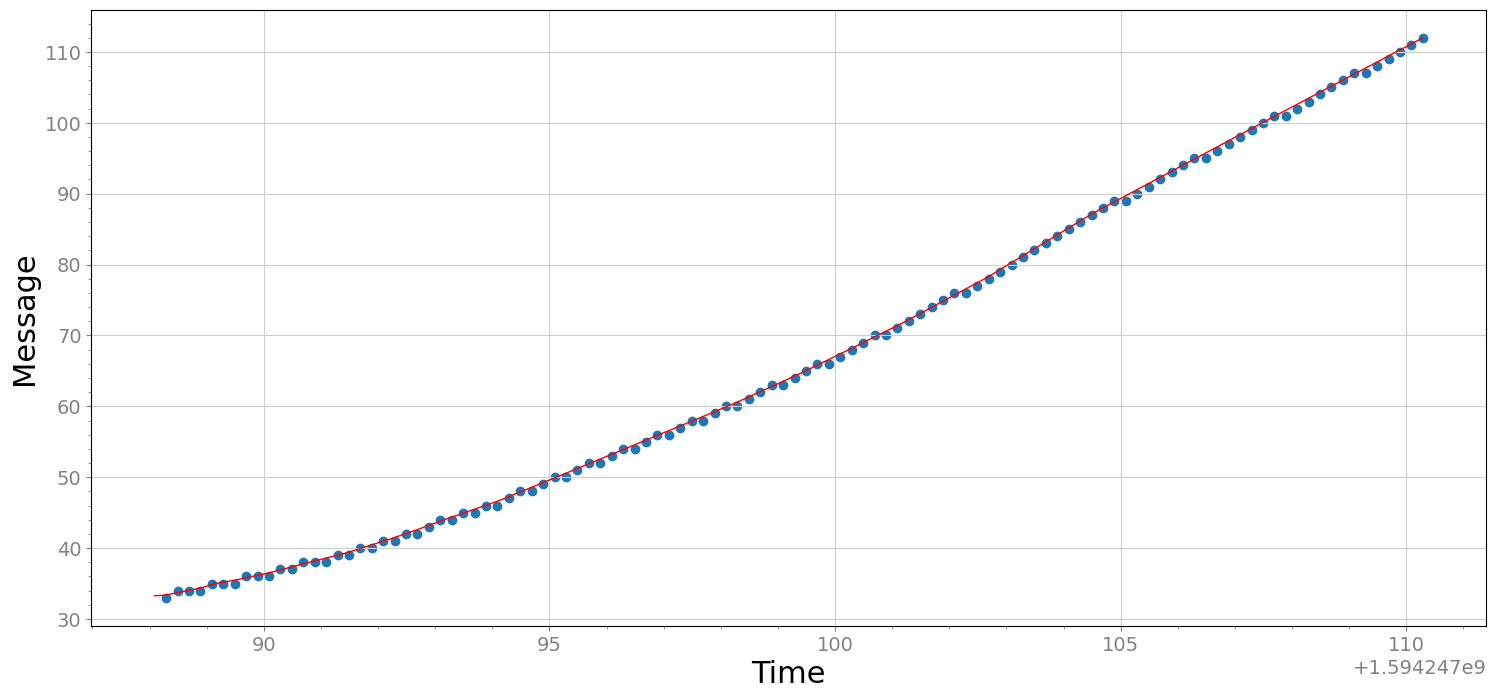

In [12]:
# Display the result
plt.scatter(time_original, message_original)
plt.plot(newtimepoints, y_predicted, 'r', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Message')
plt.grid()
plt.show()

## Now check differnetiation of above message

In [13]:
df = pd.DataFrame()
df['Time'] = newtimepoints
df['Message'] = y_predicted

df_new = strymread.differentiate(df)
df['diff'] = df['Message'].diff()/df['Time'].diff()
df['diff'].iloc[0] = 0.0
df

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Time,Message,diff
Clock,,,
2020-07-08 22:24:48.088862181,1.594247e+09,33.279675,0.000000
2020-07-08 22:24:48.091082573,1.594247e+09,33.280293,0.278321
2020-07-08 22:24:48.093302965,1.594247e+09,33.280910,0.278321
2020-07-08 22:24:48.095523119,1.594247e+09,33.281548,0.286942
2020-07-08 22:24:48.097743511,1.594247e+09,33.282181,0.285193
...,...,...,...
2020-07-08 22:25:10.281137705,1.594247e+09,111.938843,4.157629
2020-07-08 22:25:10.283358097,1.594247e+09,111.948097,4.167937
2020-07-08 22:25:10.285578251,1.594247e+09,111.957352,4.168385


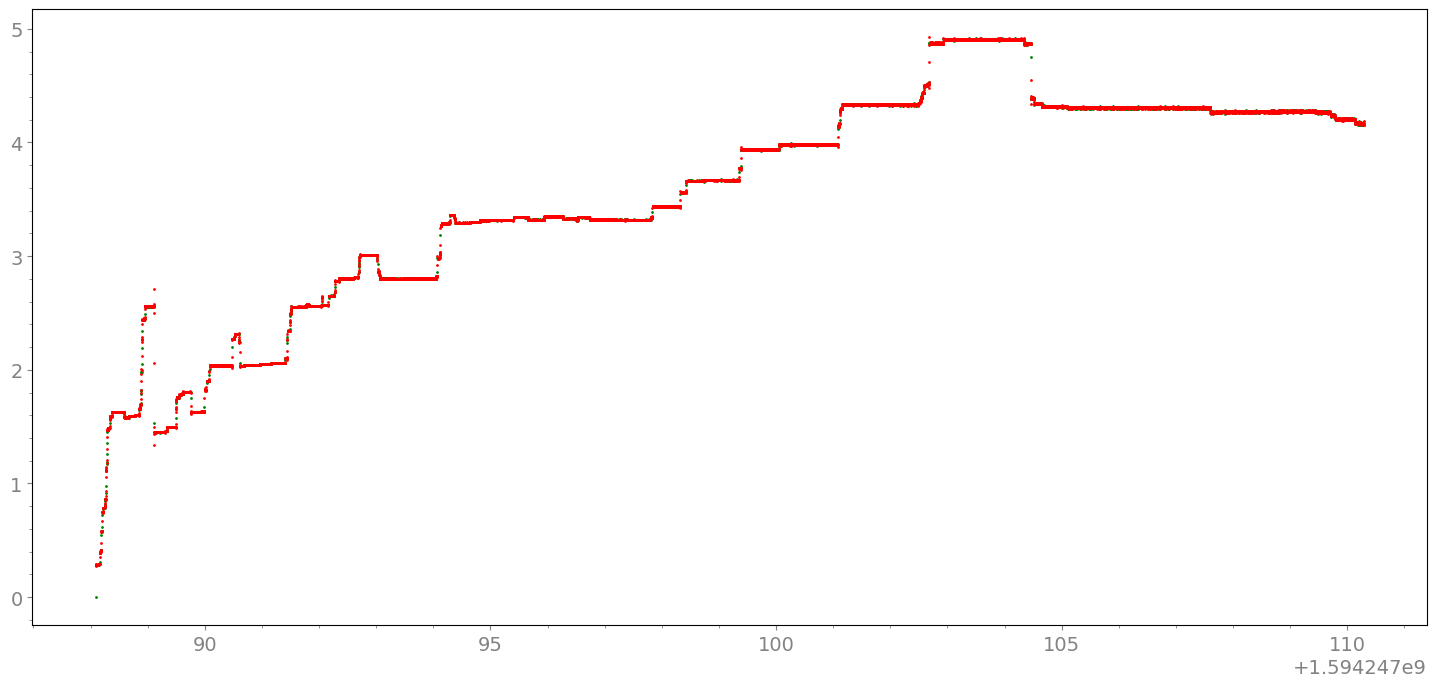

In [14]:
plt.scatter(df['Time'], df['diff'], s = 1, c="green")
plt.scatter(df_new['Time'], df_new['Message'], s = 1, c="red")

In [15]:
def ml_differentiate(df, verbose = False, dense_time_points = True):
    """
    Autoencoder based denosing followed by differentiation.
    Reference: https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/
    
    
    """
    # Check the monotonicity of the time in df
    collect_indices = []
    for i in range(0, len(df['Time'].values)-1):
        if df['Time'].values[i] == df['Time'].values[i+1]:
            collect_indices.append(df.index.values[i+1])
    df = df.drop(collect_indices)
    assert(np.all(np.diff(df['Time'].values) > 0.0)), ('Timestamps are not unique')
    
    
    time_original = df['Time'].values
    
    if time_original[-1] != time_original[0]:
        time = (time_original - time_original[0])/(time_original[-1] - time_original[0])
    else:
        time = time_original
    message_original = df['Message'].values
    msg_max = np.max(message_original)
    msg_min = np.min(message_original)
    
    if message_original[-1] != message_original[0]:
        message = (message_original  - msg_min)/(msg_max - msg_min)
    else:
        message = message_original
    
    import tensorflow as tf
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
    model.compile(loss='mse', optimizer="adam")
    
    if verbose:
        model.summary()
    # Training
    model.fit( time, message, epochs=1000, verbose=verbose)
    
    
    newtimepoints_scaled = np.linspace(time[0],time[-1], 10000)
    y_predicted_scaled = model.predict(newtimepoints_scaled)

    newtimepoints = newtimepoints_scaled*(time_original[-1] - time_original[0]) + time_original[0]
    y_predicted = y_predicted_scaled*(msg_max - msg_min) + msg_min
    
    if dense_time_points:
        newtimepoints_scaled = np.linspace(time[0],time[-1], df.shape[0]*50)
    else:
        newtimepoints_scaled = time
    y_predicted_scaled = model.predict(newtimepoints_scaled)

    newtimepoints = newtimepoints_scaled*(time_original[-1] - time_original[0]) + time_original[0]
    y_predicted = y_predicted_scaled*(msg_max - msg_min) + msg_min
    
    df_new = pd.DataFrame()
    df_new['Time'] = newtimepoints
    df_new['Message'] = y_predicted
    
    collect_indices = []
    for i in range(0, len(df_new['Time'].values)-1):
        if df_new['Time'].values[i] == df_new['Time'].values[i+1]:
            collect_indices.append(df_new.index.values[i+1])
    df_new = df_new.drop(collect_indices)
    
    assert(np.all(np.diff(df_new['Time'].values) > 0.0)), ('Timestamps are not unique')
    
    df_new['diff'] = df_new['Message'].diff()/df_new['Time'].diff()
    df_new.at[0,'diff']=0.0
    df_new.drop(columns=['Message'], inplace=True)
    df_new.rename(columns={"diff": "Message"}, inplace = True)

    return df_new

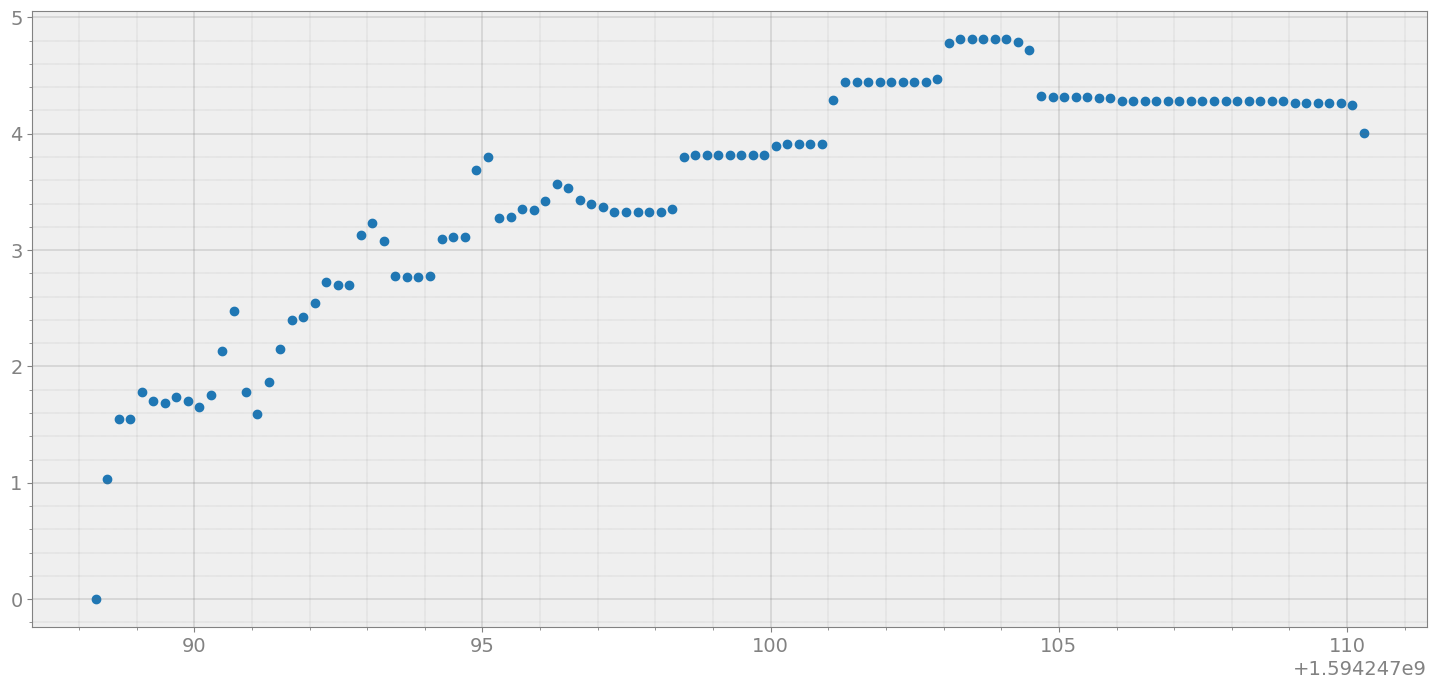

In [16]:
dn2 = ml_differentiate(lead_dist_l_chunks[2], dense_time_points=False)
fig, ax = strymread.create_fig(1)
ax[0].scatter(x  = 'Time', y = 'Message', data = dn2)
plt.show()

In [17]:
dflist = []
for m in lead_dist_l_chunks:
    lp = ml_differentiate(m, dense_time_points=False)
    dflist.append(lp)

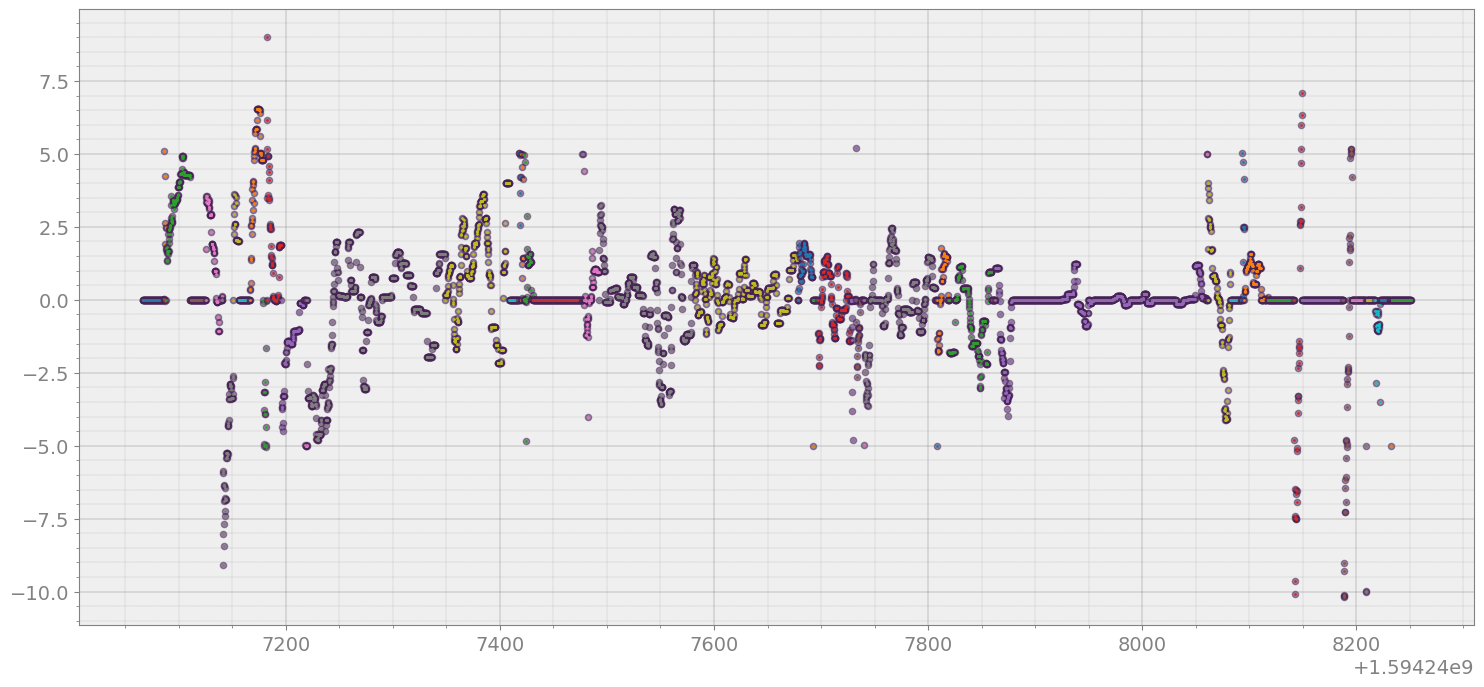

In [18]:
fig, ax = strymread.create_fig(1)
for po in dflist:
    ax[0].scatter(x = 'Time', y  = "Message", data = po, s = 20,marker = 'o', alpha = 0.5, color = "#462255")
    ax[0].scatter(x = 'Time', y  = "Message", data = po, s = 1)

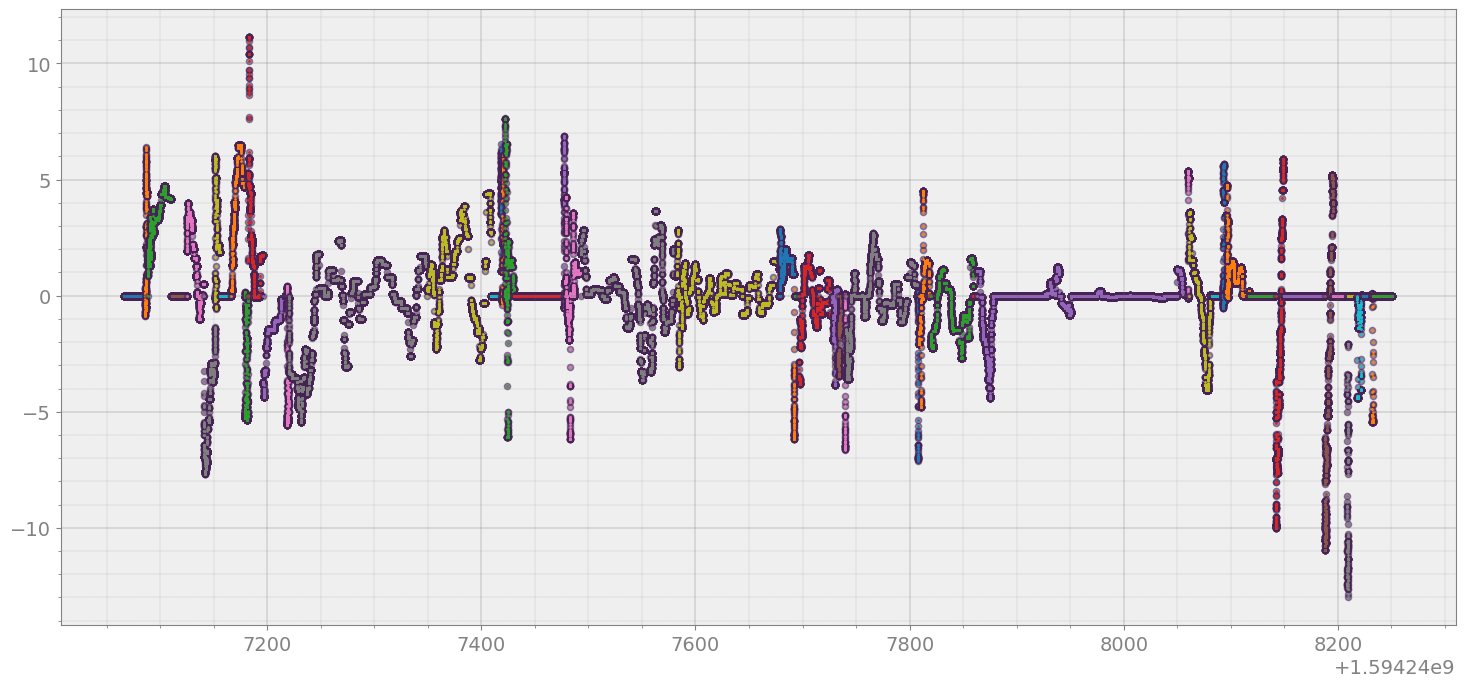

In [19]:
dflist = []
for m in lead_dist_l_chunks:
    lp = ml_differentiate(m, dense_time_points=True)
    dflist.append(lp)
    
fig, ax = strymread.create_fig(1)
for po in dflist:
    ax[0].scatter(x = 'Time', y  = "Message", data = po, s = 20,marker = 'o', alpha = 0.5, color = "#462255")
    ax[0].scatter(x = 'Time', y  = "Message", data = po, s = 1)